#### Problem Statement.
    An automobile company has plans to enter new markets with their existing products (P1, P2, P3, P4 and P5). 
    After intensive market research, they’ve deduced that the behavior of new market is similar to their existing market.
    In their existing market, the sales team has classified all customers into 4 segments (A, B, C, D ).

# Data Science: Customer Segmentation Using Random Forest.

## Importing the Libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the datasets.

In [3]:
df = pd.read_csv('Train.csv')

In [4]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [5]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [6]:
df.shape

(8068, 11)

In [7]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [8]:
df.drop(['ID'], axis=1)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [9]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [10]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

## Finding Categorical Data.

In [11]:
df.dtypes

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
Segmentation        object
dtype: object

In [12]:

categorical_features = df.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

total categorical_features 7


<ipython-input-12-b1f85dbef2a2>:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features = df.select_dtypes(include=[np.object]).columns


In [13]:
df[categorical_features]

,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,Male,No,No,Healthcare,Low,Cat_4,D
1,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,Female,Yes,Yes,Entertainment,High,Cat_6,A
...,...,...,...,...,...,...,...
8063,Male,No,No,NaN,Low,Cat_1,D
8064,Male,No,No,Executive,Low,Cat_4,D
8065,Female,No,Yes,Healthcare,Low,Cat_6,D
8066,Female,No,Yes,Healthcare,Low,Cat_6,B


In [14]:
df['Gender'].value_counts()

Male      4417
Female    3651
Name: Gender, dtype: int64

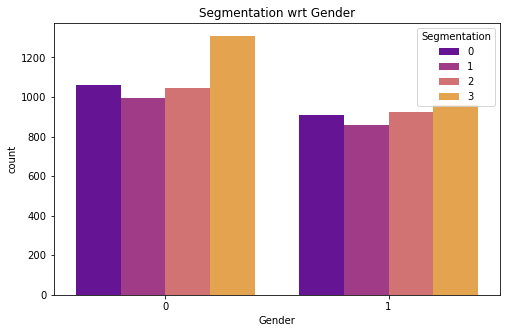

In [77]:
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Gender")
plt.show()

In [15]:
df['Ever_Married'].value_counts()

Yes    4643
No     3285
Name: Ever_Married, dtype: int64

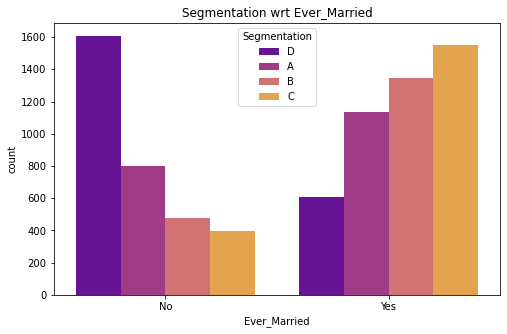

In [16]:
plt.figure(figsize=(8,5))
sns.countplot(x='Ever_Married',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Ever_Married")
plt.show()

In [17]:
## Married people are mostly part of segmentation C, whereas unmarried people are mostly part of segmentation D

In [18]:
df['Graduated'].value_counts()

Yes    4968
No     3022
Name: Graduated, dtype: int64

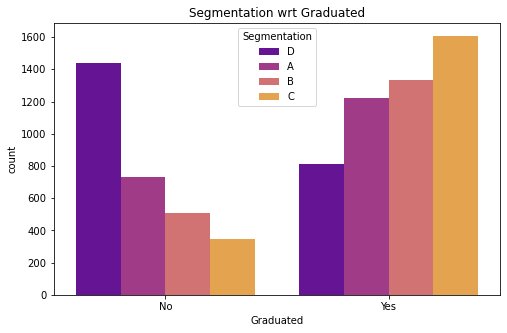

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(x='Graduated',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Graduated")
plt.show()

In [20]:
## Graduated People are mostly part of Segmentation C, whereas Non-graduates are mostly part of segmenation D.

In [21]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

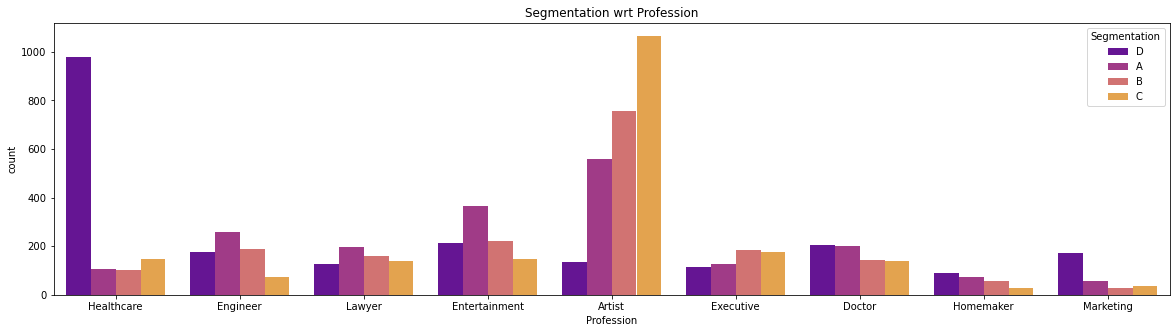

In [22]:
plt.figure(figsize=(20,5))
sns.countplot(x='Profession',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Profession")
plt.show()

In [23]:
## Healthcare Workers are mostly part of Segmentation D.

In [24]:
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

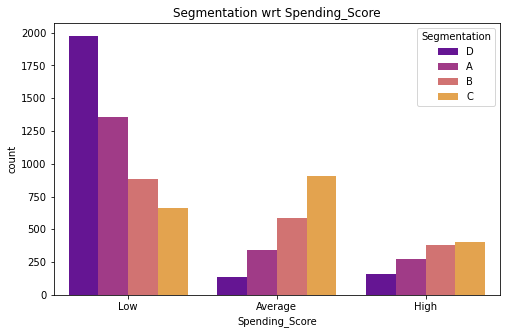

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x='Spending_Score',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Spending_Score")
plt.show()

In [ ]:
## People with low spending score are mostly part of Segmentation D

In [26]:
df['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

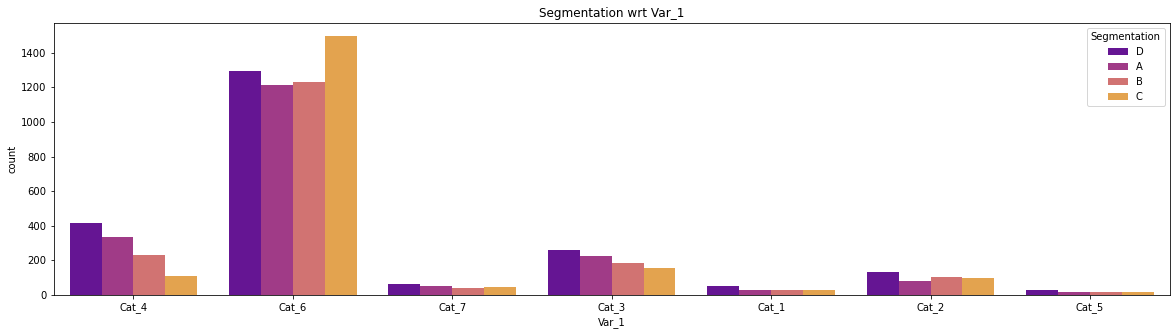

In [27]:
plt.figure(figsize=(20,5))
sns.countplot(x='Var_1',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Var_1")
plt.show()

In [28]:
df['Family_Size'].value_counts()

2.0    2390
3.0    1497
1.0    1453
4.0    1379
5.0     612
6.0     212
7.0      96
8.0      50
9.0      44
Name: Family_Size, dtype: int64

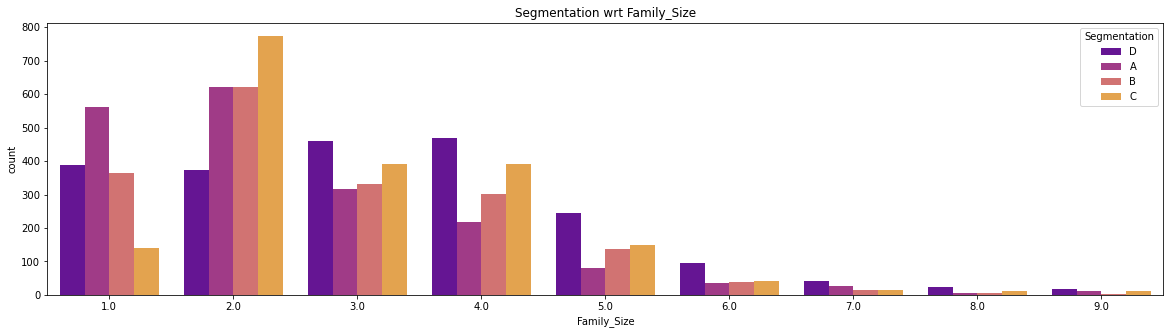

In [29]:
plt.figure(figsize=(20,5))
sns.countplot(x='Family_Size',hue='Segmentation', data=df, palette='plasma')
plt.title("Segmentation wrt Family_Size")
plt.show()

## Encoding Categorical Data.

In [30]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [31]:
df = df.drop(['ID'], axis=1)

In [32]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [33]:
# Replacing Male with 0 and Female with 1 in Gender column
df['Gender'] = df['Gender'].replace({'Male':0,'Female':1})

In [34]:
# Replacing No with 0 and Yes with 1 in Ever_Married column
df['Ever_Married'] = df['Ever_Married'].replace({'No':0,'Yes':1})

In [36]:
# Replacing No with 0 and Yes with 1 in Graduated column
df['Graduated'] = df['Graduated'].replace({'No':0,'Yes':1})

In [37]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,Healthcare,1.0,Low,4.0,Cat_4,D
1,1,1.0,38,1.0,Engineer,NaN,Average,3.0,Cat_4,A
2,1,1.0,67,1.0,Engineer,1.0,Low,1.0,Cat_6,B
3,0,1.0,67,1.0,Lawyer,0.0,High,2.0,Cat_6,B
4,1,1.0,40,1.0,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,Low,7.0,Cat_1,D
8064,0,0.0,35,0.0,Executive,3.0,Low,4.0,Cat_4,D
8065,1,0.0,33,1.0,Healthcare,1.0,Low,1.0,Cat_6,D
8066,1,0.0,27,1.0,Healthcare,1.0,Low,4.0,Cat_6,B


In [38]:
df['Spending_Score'].value_counts()

Low        4878
Average    1974
High       1216
Name: Spending_Score, dtype: int64

In [40]:
# Replacing Low with 0, Average with 1 and High with 2 in Spending_Score column
df['Spending_Score'] = df['Spending_Score'].replace({'Low':0,'Average':1,'High':2})

In [41]:
df['Var_1'].value_counts()

Cat_6    5238
Cat_4    1089
Cat_3     822
Cat_2     422
Cat_7     203
Cat_1     133
Cat_5      85
Name: Var_1, dtype: int64

In [42]:
# Replacing Cat_1 with 1, Cat_2 with 2, Cat_3 with 3, Cat4 with 4, Cat_5 with 5, Cat_6 with 6, and Cat_7 with 7 in Var_1 column
df['Var_1'] = df['Var_1'].replace({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7})

In [43]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,Healthcare,1.0,0,4.0,4.0,D
1,1,1.0,38,1.0,Engineer,NaN,1,3.0,4.0,A
2,1,1.0,67,1.0,Engineer,1.0,0,1.0,6.0,B
3,0,1.0,67,1.0,Lawyer,0.0,2,2.0,6.0,B
4,1,1.0,40,1.0,Entertainment,NaN,2,6.0,6.0,A
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,0,7.0,1.0,D
8064,0,0.0,35,0.0,Executive,3.0,0,4.0,4.0,D
8065,1,0.0,33,1.0,Healthcare,1.0,0,1.0,6.0,D
8066,1,0.0,27,1.0,Healthcare,1.0,0,4.0,6.0,B


In [44]:
df['Profession'].value_counts()

Artist           2516
Healthcare       1332
Entertainment     949
Engineer          699
Doctor            688
Lawyer            623
Executive         599
Marketing         292
Homemaker         246
Name: Profession, dtype: int64

In [45]:
# Replacing Artist with 0, Healthcare with 1, Entertainment with 2, Engineer with 3, Doctor with 4, Lawyer with 5, Executive with 6, Marketing with 7 and Homemaker with 8 in Var_1 column
df['Profession'] = df['Profession'].replace({'Artist':0,'Healthcare':1,'Entertainment':2,'Engineer':3,'Doctor':4,'Lawyer':5,'Executive':6,'Marketing':7,'Homemaker':8})

In [46]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,1.0,1.0,0,4.0,4.0,D
1,1,1.0,38,1.0,3.0,NaN,1,3.0,4.0,A
2,1,1.0,67,1.0,3.0,1.0,0,1.0,6.0,B
3,0,1.0,67,1.0,5.0,0.0,2,2.0,6.0,B
4,1,1.0,40,1.0,2.0,NaN,2,6.0,6.0,A
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,0,7.0,1.0,D
8064,0,0.0,35,0.0,6.0,3.0,0,4.0,4.0,D
8065,1,0.0,33,1.0,1.0,1.0,0,1.0,6.0,D
8066,1,0.0,27,1.0,1.0,1.0,0,4.0,6.0,B


In [47]:
df['Profession'].value_counts()

0.0    2516
1.0    1332
2.0     949
3.0     699
4.0     688
5.0     623
6.0     599
7.0     292
8.0     246
Name: Profession, dtype: int64

In [48]:
df['Var_1'].value_counts()

6.0    5238
4.0    1089
3.0     822
2.0     422
7.0     203
1.0     133
5.0      85
Name: Var_1, dtype: int64

In [49]:
df['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [50]:
# Replacing A with 0, B with 1, C with 2 and D with 3 in Spending_Score column
df['Segmentation'] = df['Segmentation'].replace({'A':0,'B':1,'C':2,'D':3})

In [51]:
df['Segmentation'].value_counts()

3    2268
0    1972
2    1970
1    1858
Name: Segmentation, dtype: int64

In [52]:
df

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,0,0.0,22,0.0,1.0,1.0,0,4.0,4.0,3
1,1,1.0,38,1.0,3.0,NaN,1,3.0,4.0,0
2,1,1.0,67,1.0,3.0,1.0,0,1.0,6.0,1
3,0,1.0,67,1.0,5.0,0.0,2,2.0,6.0,1
4,1,1.0,40,1.0,2.0,NaN,2,6.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...
8063,0,0.0,22,0.0,NaN,0.0,0,7.0,1.0,3
8064,0,0.0,35,0.0,6.0,3.0,0,4.0,4.0,3
8065,1,0.0,33,1.0,1.0,1.0,0,1.0,6.0,3
8066,1,0.0,27,1.0,1.0,1.0,0,4.0,6.0,1


## Filling missing data.

In [63]:
df.isnull().sum()

Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [64]:
df['Ever_Married'].fillna(int(df['Ever_Married'].mean()), inplace=True)

In [65]:
df['Ever_Married'].value_counts()

1.0    4643
0.0    3425
Name: Ever_Married, dtype: int64

In [66]:
df['Graduated'].fillna(int(df['Graduated'].mean()), inplace=True)
df['Profession'].fillna(int(df['Profession'].mean()), inplace=True)
df['Work_Experience'].fillna(int(df['Work_Experience'].mean()), inplace=True)
df['Family_Size'].fillna(int(df['Family_Size'].mean()), inplace=True)
df['Var_1'].fillna(int(df['Var_1'].mean()), inplace=True)

In [67]:
df.isna().sum()

Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## Splitting Dataset into Training and Testing Set.

In [68]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [69]:
print(X)
print(y)

[[ 0.  0. 22. ...  0.  4.  4.]
 [ 1.  1. 38. ...  1.  3.  4.]
 [ 1.  1. 67. ...  0.  1.  6.]
 ...
 [ 1.  0. 33. ...  0.  1.  6.]
 [ 1.  0. 27. ...  0.  4.  6.]
 [ 0.  1. 37. ...  1.  3.  4.]]
[3 0 1 ... 3 1 1]


In [70]:
## training & splitting the dataset.
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
X_train

array([[ 1.,  1., 38., ...,  0.,  4.,  3.],
       [ 1.,  0., 33., ...,  0.,  5.,  3.],
       [ 1.,  1., 49., ...,  0.,  1.,  7.],
       ...,
       [ 1.,  0., 40., ...,  0.,  1.,  6.],
       [ 0.,  1., 29., ...,  0.,  5.,  4.],
       [ 1.,  0., 27., ...,  0.,  9.,  6.]])

## Training the Random Forest Classification model on Training Set.

In [73]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

## Predicting Test Set Result.

In [74]:
y_pred = classifier.predict(X_test)

In [75]:
y_pred

array([3, 0, 3, ..., 2, 3, 1], dtype=int64)

## Making Confusion Matrix.

In [76]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[148  86  56 101]
 [ 90 126 107  46]
 [ 61  82 192  45]
 [ 87  37  25 325]]


0.49008674101610905